In [1]:
# here we have imported necessary libraries
# functions for interacting with the operating system
import os
# imorting library for fast numerical computing
import tensorflow as tf
# defining model about linear stack of layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
# define keras optimizer
from tensorflow.keras.optimizers import RMSprop
# import ptrprocesser for image data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import ModelCheckpoint for continously save model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
import keras_preprocessing
from keras_preprocessing import image
from sklearn.datasets import load_files
import matplotlib.image as mpimg
import numpy as np
# magic function that renders the figure in a notebook
%matplotlib inline
# plotting a figure
import matplotlib.pyplot as plt
from keras.utils import np_utils

Using TensorFlow backend.


(100, 100, 3)


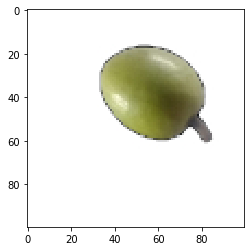

In [2]:
#view sample training data and shape of data
img = mpimg.imread(r'C:\Users\USER\Desktop\fruit_recognition\fruits-360\Training\Veralu\Veralu (12).jpg')
print(img.shape)
plt.imshow(img)

(100, 100, 3)


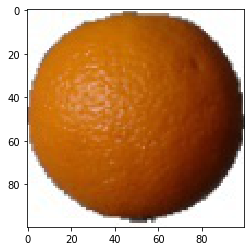

In [3]:
#view sample training data and shape of data
img = mpimg.imread(r'C:\Users\USER\Desktop\fruit_recognition\fruits-360\Training\Orange\0_100.jpg')
print(img.shape)
plt.imshow(img)

In [4]:
#view sample of training data class and shape of data class
train_veralu_dir = r"C:\Users\USER\Desktop\fruit_recognition\fruits-360\Training\Veralu"
number_veralu_train = len(os.listdir(train_veralu_dir))
print("Total training veralu images:", number_veralu_train)

#view sample of training data class and shape of data class
train_orange_dir = r"C:\Users\USER\Desktop\fruit_recognition\fruits-360\Training\Orange"
number_orange_train = len(os.listdir(train_orange_dir))
print("Total training Orange images:", number_orange_train)

Total training veralu images: 86
Total training Orange images: 479


In [5]:
veralu_names = os.listdir(train_veralu_dir)
veralu_names[:10]

orange_names = os.listdir(train_orange_dir)
orange_names[:10]

['0_100.jpg',
 '100_100.jpg',
 '101_100.jpg',
 '102_100.jpg',
 '103_100.jpg',
 '104_100.jpg',
 '105_100.jpg',
 '106_100.jpg',
 '107_100.jpg',
 '108_100.jpg']

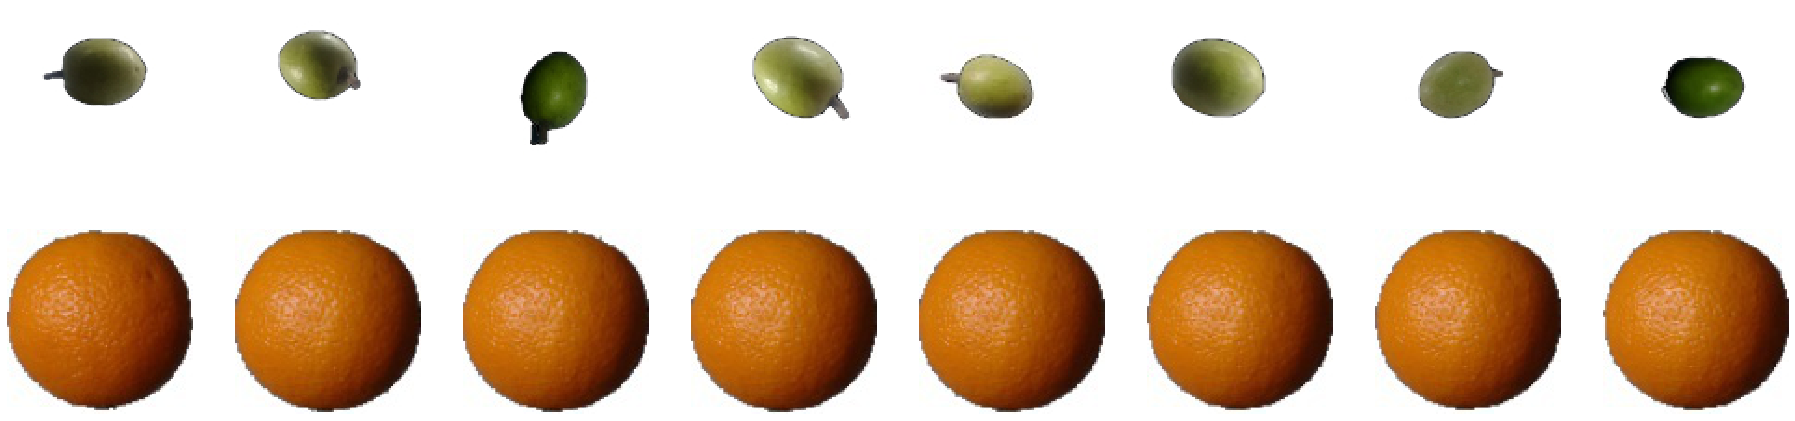

In [6]:
#view sample of training data class
nrows = 8
ncols = 8

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

veralu_pic = [os.path.join(train_veralu_dir,fname) for fname in veralu_names[pic_index-8:pic_index]]
orange_pic = [os.path.join(train_orange_dir,fname) for fname in orange_names[pic_index-8:pic_index]]

for i, img_path in enumerate(veralu_pic + orange_pic):
    sub = plt.subplot(nrows, ncols, i + 1)
    sub.axis("Off")
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [7]:
#view whole of training data and testing data
import os, os.path
train_categories = []
train_samples = []
for i in os.listdir(r"C:/Users/USER/Desktop/fruit_recognition/fruits-360/Training/"):
    train_categories.append(i)
    train_samples.append(len(os.listdir(r"C:/Users/USER/Desktop/fruit_recognition/fruits-360/Training/"+ i)))

test_categories = []
test_samples = []
for i in os.listdir(r"C:/Users/USER/Desktop/fruit_recognition/fruits-360/Test/"):
    test_categories.append(i)
    test_samples.append(len(os.listdir(r"C:/Users/USER/Desktop/fruit_recognition/fruits-360/Test/"+ i)))

    
print("Count of Fruits in Training data set:", sum(train_samples))
print("Count of Fruits in Testing data set:", sum(test_samples))

Count of Fruits in Training data set: 67778
Count of Fruits in Testing data set: 22774


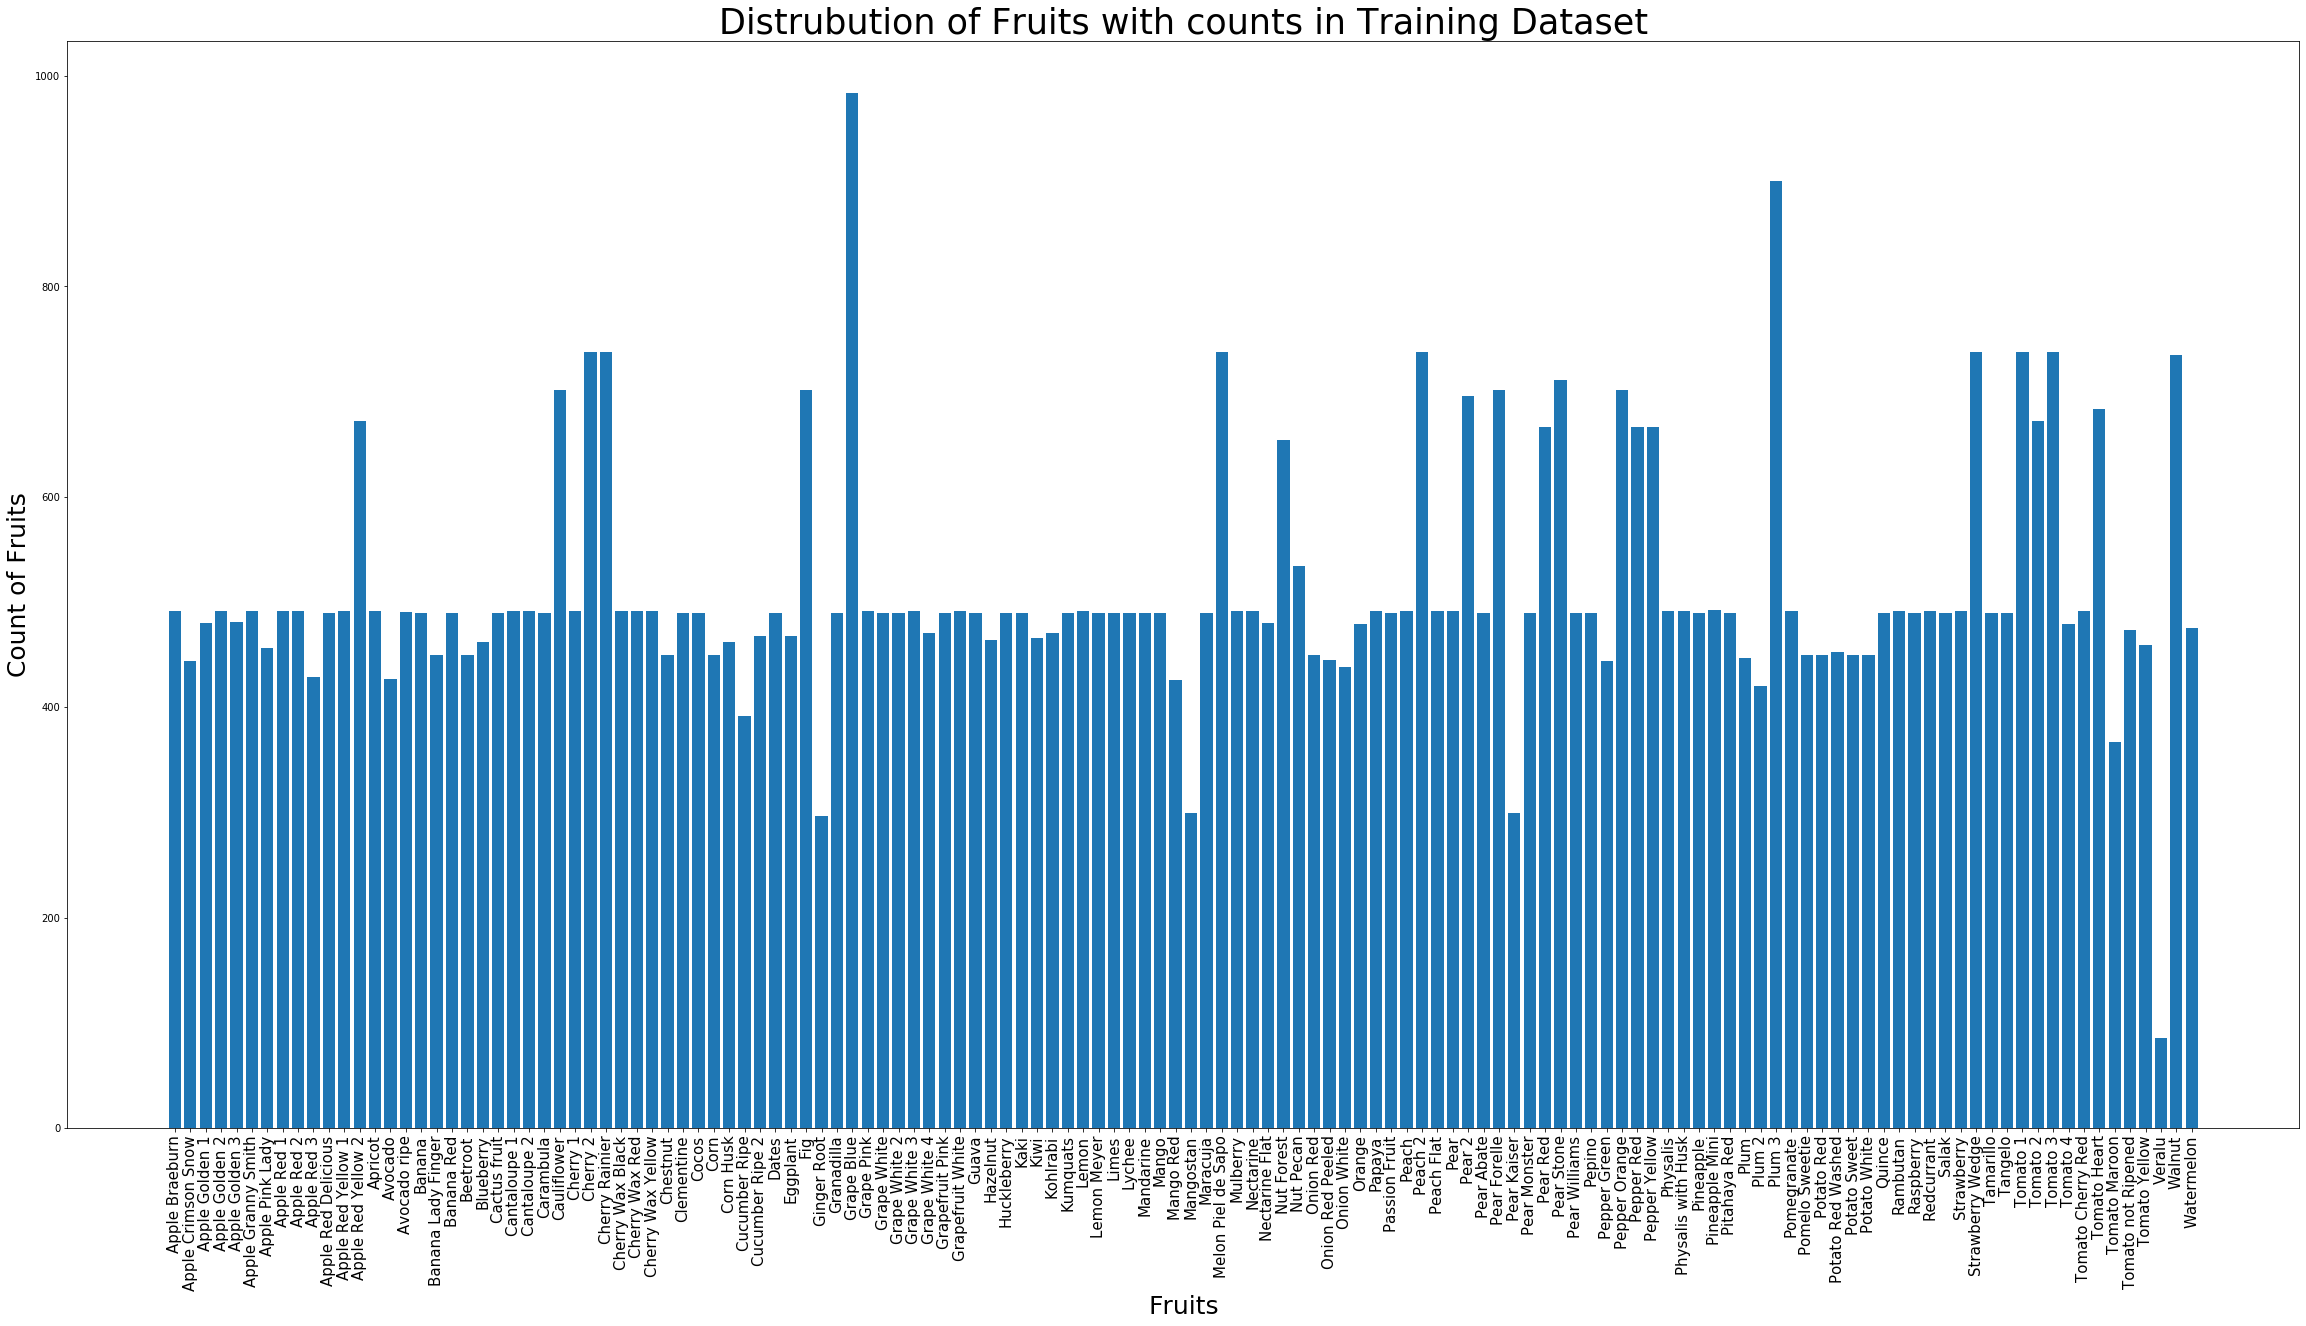

In [8]:
#distribution of training data 
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(train_categories))
plt.bar(index, train_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Training Dataset', fontsize=35)
plt.show()

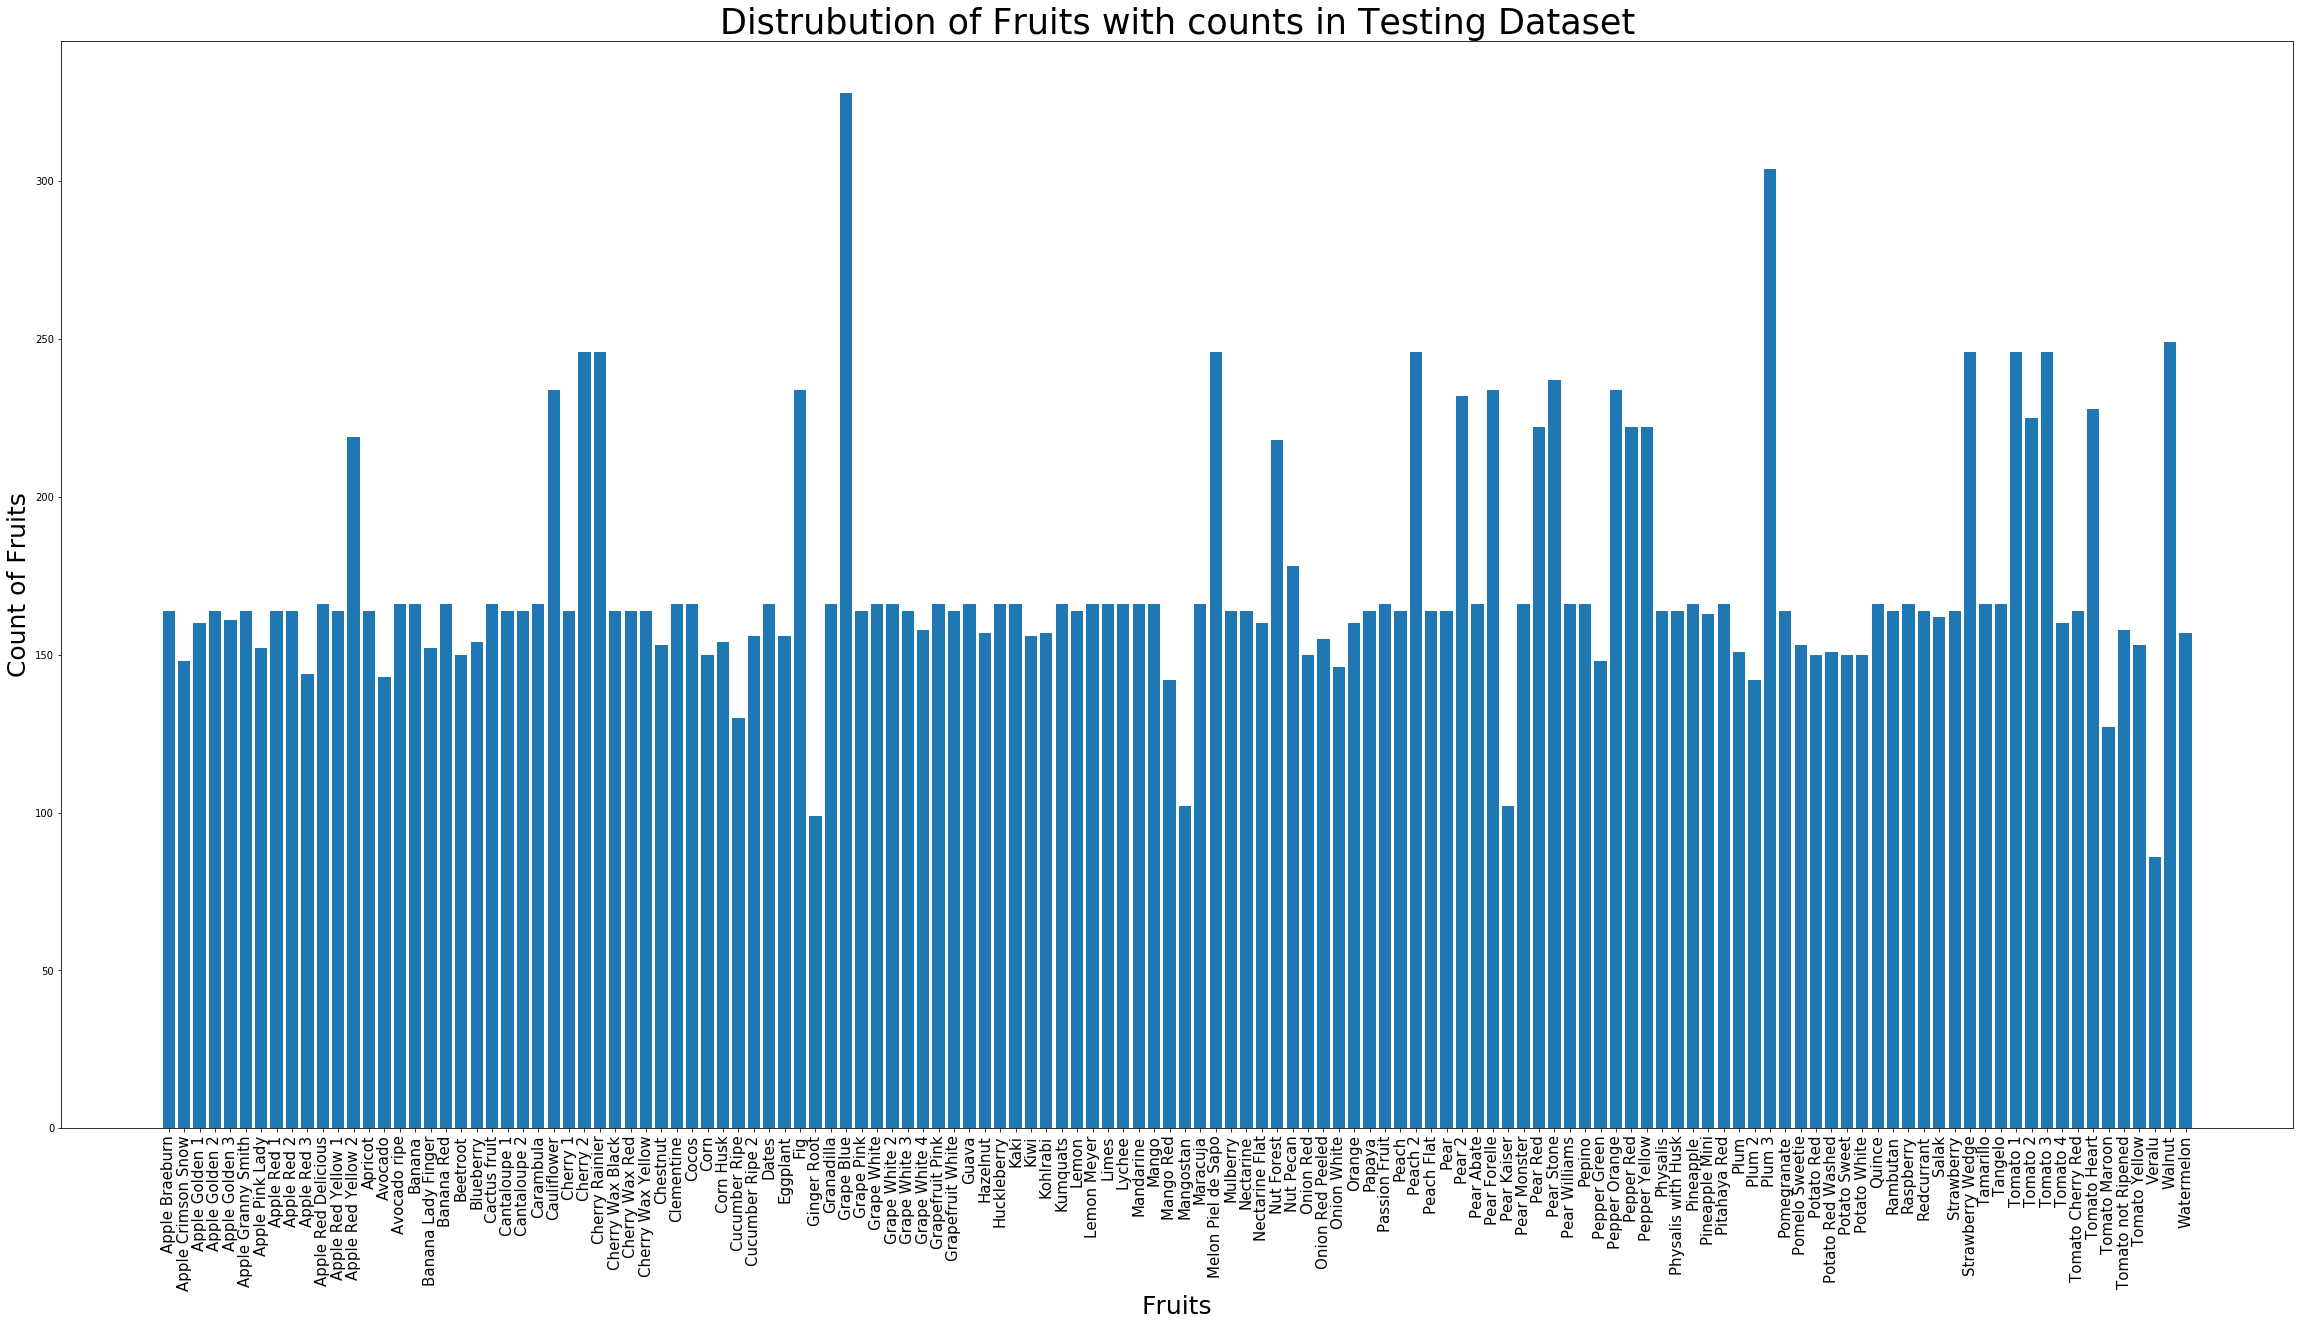

In [9]:
#distribution of testing data 
index2 = np.arange(len(test_categories))
plt.bar(index2, test_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index2, test_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Testing Dataset', fontsize=35)
plt.show()

In [10]:
#datasets mapping to =======> number array
train_dir = r'C:/Users/USER/Desktop/fruit_recognition/fruits-360/Training/'
test_dir = r'C:/Users/USER/Desktop/fruit_recognition/fruits-360/Test/'

def load_dataset(data_path):
    data_loading = load_files(data_path)
    files_add = np.array(data_loading['filenames'])
    targets_fruits = np.array(data_loading['target'])
    target_labels_fruits = np.array(data_loading['target_names'])
    return files_add,targets_fruits,target_labels_fruits
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)

In [11]:
no_of_classes = len(np.unique(y_train))
no_of_classes

132

In [12]:
#view sample array data 
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
#shape of validation data & testing data 
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 132)
Test X :  (15774,)
Test y :  (15774, 132)


In [14]:
#function of images are mapping array
def convert_image_to_array_form(files):
    images_array=[]
    for file in files:
        images_array.append(img_to_array(load_img(file)))
    return images_array

x_train = np.array(convert_image_to_array_form(x_train))
print('Training dataset shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array_form(x_valid))
print('Validation dataset shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array_form(x_test))
print('Test dataset shape : ',x_test.shape)

print('initial training image shape ',x_train[0].shape)


Training dataset shape :  (67778, 100, 100, 3)
Validation dataset shape :  (7000, 100, 100, 3)
Test dataset shape :  (15774, 100, 100, 3)
initial training image shape  (100, 100, 3)


In [15]:
#preprocessing data ===> scale
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

In [16]:
#define our network model 
def tensorflow_based_model():
    # step 1
    model = Sequential()
    # step2
    model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same')) 
    # step3
    model.add(Activation('relu'))  
    # step4
    model.add(MaxPooling2D(pool_size=2))
    # repeating step 2 and step3 but with more filters of 32
    model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same')) 
    # repeating step 4 again
    model.add(MaxPooling2D(pool_size=2))
    # repeating step 2 and step3 but with more filters of 64
    model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same')) 
    # repeating step 4 again
    model.add(MaxPooling2D(pool_size=2)) 
    # repeating step 2 and step3 but with more filters of 64
    model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same')) 
    # repeating step 4 again
    model.add(MaxPooling2D(pool_size=2))
    # step5
    model.add(Dropout(0.3)) 
    # step 6
    model.add(Flatten()) 
    # step 7
    model.add(Dense(150))
    # setp 3
    model.add(Activation('relu')) 
    # step 5
    model.add(Dropout(0.4)) 
    # setp3 and step7. but this time, we are using activation function as softmax 
    # (if we train on two classes then we set sigmoid)
    model.add(Dense(132,activation = 'softmax')) 
    # function returning the value when we call it
    return model 

In [17]:
# here we are calling the function of created model
model = tensorflow_based_model() 
# here we are get the summary of created model
model.summary() 
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      208       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

In [18]:
#model training process and saving process
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs = 30,
        validation_data=(x_valid, y_vaild),
        verbose=2,
        shuffle=True
)

filepath = r"C:\Users\USER\Desktop\fruit_recognition\fruits-360\model"
tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format="tf",
    signatures=None
)
model.save("fruit_classification_model.h5")

Train on 67778 samples, validate on 7000 samples
Epoch 1/30
67778/67778 - 155s - loss: 1.1259 - accuracy: 0.6930 - val_loss: 0.3043 - val_accuracy: 0.9251
Epoch 2/30
67778/67778 - 152s - loss: 0.1597 - accuracy: 0.9481 - val_loss: 0.2833 - val_accuracy: 0.9454
Epoch 3/30
67778/67778 - 151s - loss: 0.0928 - accuracy: 0.9708 - val_loss: 0.2400 - val_accuracy: 0.9631
Epoch 4/30
67778/67778 - 153s - loss: 0.0732 - accuracy: 0.9774 - val_loss: 0.1801 - val_accuracy: 0.9701
Epoch 5/30
67778/67778 - 153s - loss: 0.0660 - accuracy: 0.9812 - val_loss: 0.1531 - val_accuracy: 0.9734
Epoch 6/30
67778/67778 - 166s - loss: 0.0723 - accuracy: 0.9815 - val_loss: 0.2042 - val_accuracy: 0.9761
Epoch 7/30
67778/67778 - 160s - loss: 0.0677 - accuracy: 0.9828 - val_loss: 0.1606 - val_accuracy: 0.9796
Epoch 8/30
67778/67778 - 159s - loss: 0.0690 - accuracy: 0.9835 - val_loss: 0.4302 - val_accuracy: 0.9583
Epoch 9/30
67778/67778 - 157s - loss: 0.0762 - accuracy: 0.9838 - val_loss: 0.3914 - val_accuracy: 0.96

In [19]:
#testing accuracy of trained model 
acc_score = model.evaluate(x_test, y_test) #we are starting to test the model here
print('\n', 'Test accuracy:', acc_score[1])

15774/15774 [==============================] - 31s 2ms/sample - loss: 0.6925 - accuracy: 0.9781

 Test accuracy: 0.9780652


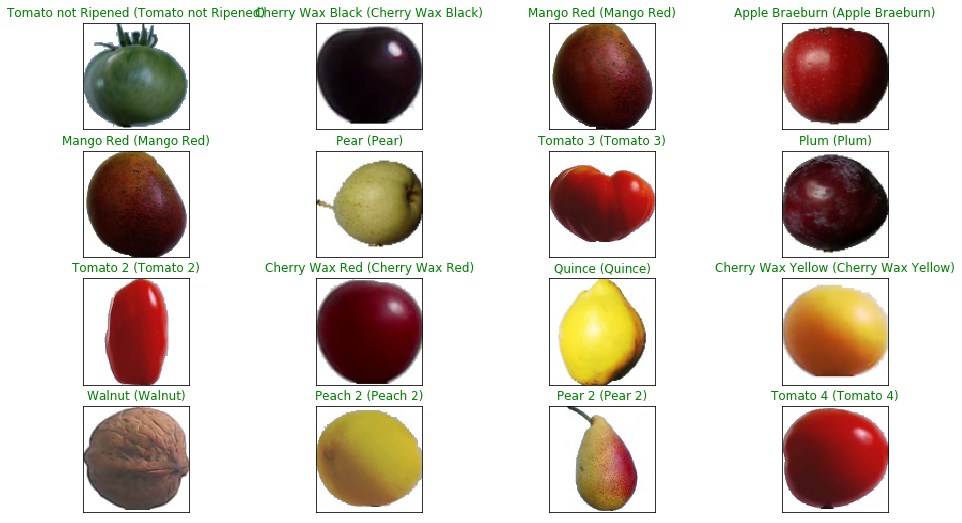

In [20]:
#here we check model predictions
predictions = model.predict(x_test)
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(predictions[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

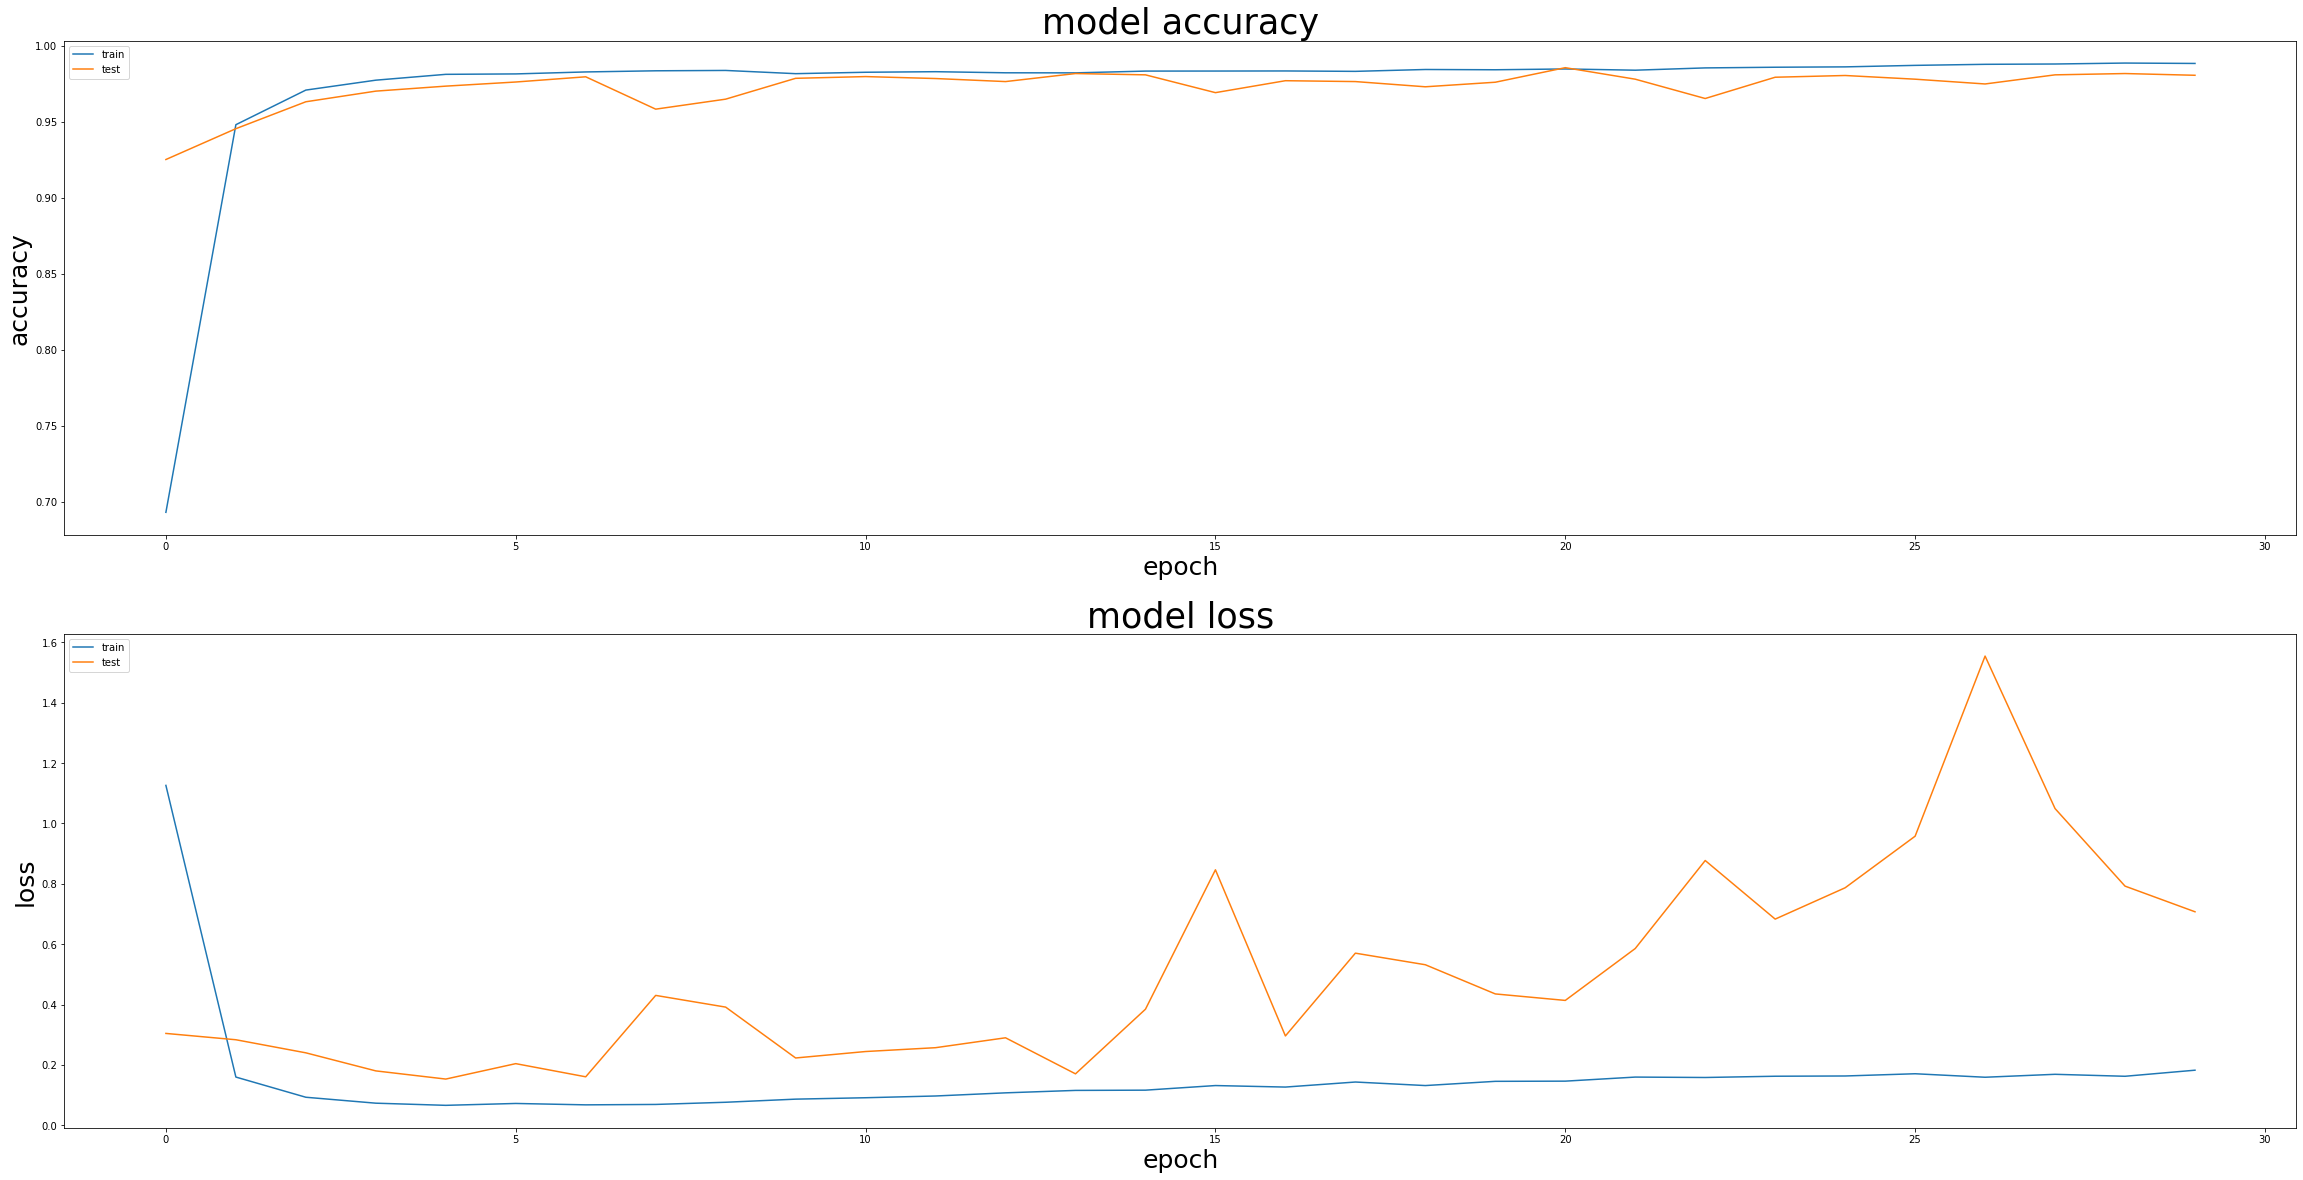

In [21]:
#how the model accuracy goes on and loss goes on
plt.figure(1)  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy',fontsize=35)  
plt.ylabel('accuracy',fontsize=25)  
plt.xlabel('epoch',fontsize=25)  
plt.legend(['train', 'test'], loc='upper left')  

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss',fontsize=35)  
plt.ylabel('loss',fontsize=25)  
plt.xlabel('epoch',fontsize=25)  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()